# Định nghĩa
`Factory Method` thuộc dòng `Creational Design Patterns` liên quan tới việc khởi tạo đối tượng. Nhóm pattern này cung cấp các cơ chế tạo đối tượng một cách linh hoạt và phù hợp với bối cảnh sử dụng, dễ dàng thay đổi và tối ưu hóa bộ nhớ.

Factory Method cung cấp một `interface` để tạo đối tượng cho lớp cha (superclass), nhưng cũng cho phép các lớp con (subclass) thay đổi đối tượng sẽ được tạo.

`Interface` ở đây đc hiểu là giao diện, tức nó chỉ là cái vỏ bên ngoài thôi còn bên trong chả có cái mẹ gì cả. Nó là một class đặc biệt (trừu tượng) mà chúng ta không thể khởi tạo một object (đối tượng) từ nó, trong python được biết đến với `abstractmethod`. Nói chung, Interface chỉ định nghĩa các phương thức (`method`) mà các lớp con phải triển khai. Các lớp con kế thừa từ interface và phải cung cấp triển khai cụ thể cho các phương thức đó.

# Vấn đề
Tưởng tượng bạn đang tạo một ứng dụng quản lý chuỗi cung ứng. Phiên bản đầu tiên của ứng dụng chỉ quản lý vận chuyển cho các xe tải, thế nên phần lớn code của bạn sẽ nằm trong lớp `Truck`.

Sau đó ứng dụng của bạn ngày càng phổ biến và bạn nhận được yêu cầu từ các công ty hàng hải để hợp nhất chuỗi cung ứng qua đường biển vào ứng dụng. Đấy là một thông tin tuyệt vời! Nhưng còn code thì sao?

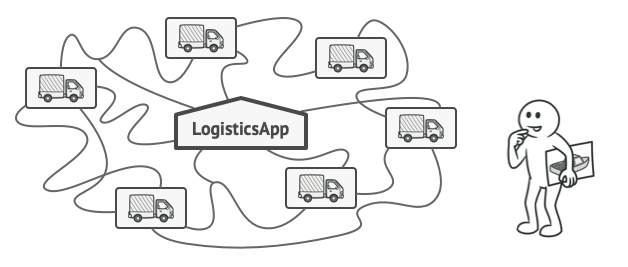

<i>Việc thêm một lớp mới vào ứng dụng không hề đơn giản nếu phần lớn code đã được kết nối với các lớp hiện có.</i>

Hiện tại hầu hết code của bạn đã được ghép với lớp Truck. Việc thêm Ship vào ứng dụng sẽ yêu cầu các thay đổi với toàn bộ codebase. Và nếu bạn thêm một phương tiện vận tải nào nữa vào ứng dụng, thì bạn sẽ thay đổi code lần nữa.

Kết quả là bạn có một đống code tạp nham với rất nhiều điều kiện thay đổi của ứng dụng tùy thuộc vào loại đối tượng vận chuyển.

# Giải pháp

`Factory Method` gợi ý giải pháp là thay vì tạo đối tượng qua các lệnh khởi tạo trực tiếp (sử dụng toán tử new) thì hãy tạo bằng cách gọi phương thức factory. Lưu ý là đối tượng vẫn được tạo thông qua toán tử new, nhưng nó sẽ được gọi từ trong phương thức factory. Các đối tượng được trả về theo phương thức factory thường được gọi là `products`.

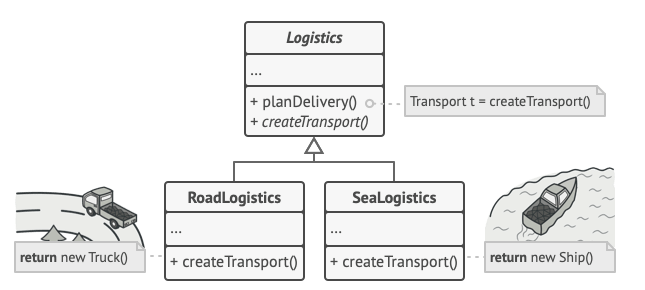

<i>Các lớp con có thể chỉnh sửa đối tượng trả về từ phương thức factory</i>

Trong hình trên:

- createTransport: factory method khởi tạo đối tượng.
- `RoadLogistics` và `SeaLogistics` kế thừa từ `Logistics` và overriding `createTransport` tương ứng cho mỗi class, ví dụ ở đây với `RoadLogistics` thì overriding để khởi tạo đối tượng `Truck`, trong khi đó`SeaLogistics` thì overriding để khởi tạo đối tượng `Ship`.

Thoạt nhìn, thay đổi này có vẻ vô nghĩa: chúng ta chỉ chuyển lệnh gọi constructor (trong python là `__init__`) từ phần này sang phần khác của chương trình. Tuy nhiên, hãy xem xét thật kỹ lưỡng : bây giờ bạn có thể ghi đè (override) phương thức factory trong một lớp con và thay đổi product đang được tạo bởi phương thức này.

Song, nó vẫn có một hạn chế nhỏ: các lớp con có thể trả về các kiểu `product` khác nhau chỉ khi các product này có lớp cơ sở hoặc `interface` chung. Ngoài ra, phương thức factory trong lớp cơ sở nên có kiểu trả về được khai báo là `interface` này.

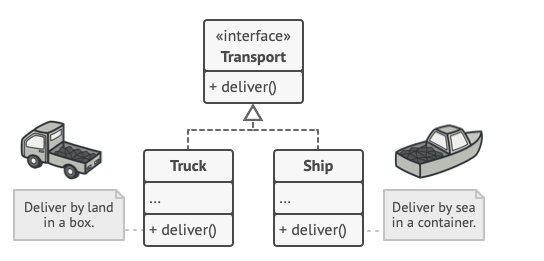

Ví dụ, cả hai lớp `Truck` và `Ship` đều được triển khai từ interface `Transport`, interface này khai báo một phương thức là `deliver`. Mỗi lớp sẽ triển khai phương thức này theo cách khác nhau, xe tải (truck) sẽ phân phối (deliver) hàng hoá theo đường bộ, còn tàu(ship) sẽ phân phối theo đường biển. Phương thức factory `RoadLogistics` sẽ trả về đối tượng `Truck`, còn `SeaLogistics` sẽ trả về đối tượng `Ship`.

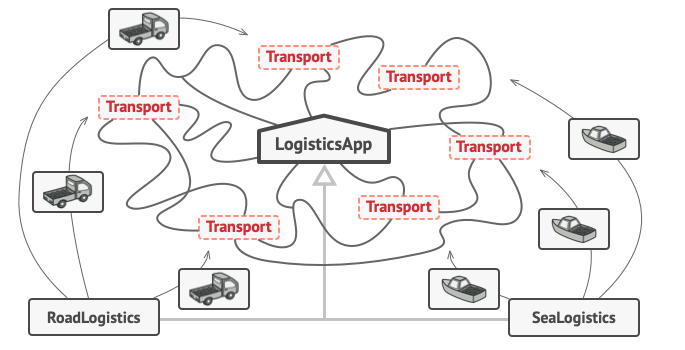

Đoạn code sử dụng phương thức factory (thường được gọi là `code client`), không nhìn thấy sự khác biệt giữa những `product` trả về bởi các lớp con khác nhau. Client coi tất cả `product` là lớp trừu tượng `Transport`, đồng thời nó cũng biết các đối tượng transport phải có phương thức `deliver`. Nhưng chi tiết cách hoạt động thì nó không cần quan tâm.

# Cấu trúc
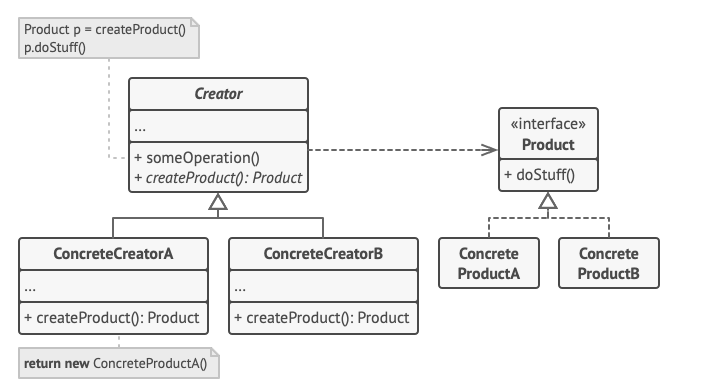

- `Product` là interface chung cho tất cả đối tượng có thể được tạo ra bởi creator hay các lớp con của nó.
- `Concrete Product` là các triển khai khác nhau từ interface Product. Tạm hiểu là product con.
- `Creator` lớp này khai báo một phương thức factory trả về đối tượng product mới. Kiểu trả về của phương thức này phải tương ứng với interface `Product`. Bạn có thể định nghĩa phương thức factory là trừu tượng (`abstractmethod`) để tất cả lớp con triển khai phiên bản riêng của chúng. Và phương thức factory (trong này là `createProduct`) cơ sở sẽ trả về các kiểu product mặc định.
- `Concreta Creator` sẽ ghi đè (override) phương thức factory cơ sở để trả về một kiểu product mới. Không phải lúc nào phương thức factory cũng tạo ra một đối tượng mới, nó có thể trả về đối tượng đã tồn tại từ cache, object pool hay từ một nguồn nào đó.

# Ứng dụng
🐞 Sử dụng phương thức Factory khi bạn không biết chính xác kiểu và phụ thuộc của đối tượng mà code bạn sẽ làm việc

⚡ Factory Method pattern giúp bạn tách biệt mã code tạo đối tượng khỏi mã code sử dụng đối tượng. Điều này giúp giảm sự phụ thuộc giữa các phần của hệ thống và làm cho mã của bạn dễ dàng bảo trì và mở rộng hơn.

⚡ Factory Method cho phép bạn kiểm soát quá trình tạo đối tượng và thực hiện các kiểm tra hoặc quyết định trước khi trả về đối tượng. Điều này có thể hữu ích khi bạn cần thực hiện kiểm tra hợp lệ hoặc điều chỉnh đối tượng trước khi sử dụng nó.

🐞 Sử dụng phương thức Factory khi bạn cung cấp cho người dùng thư viện hay framework với cách mở rộng các thành phần trong nó

⚡ Kế thừa có lẽ là cách dễ nhất để mở rộng các hành vi mặc định của một thư viện hay framework. Nhưng làm thế nào để framework nhận diện được đâu là lớp con của bạn, đâu là thành phần tiêu chuẩn. Giải pháp ở đây là làm giảm code khởi tạo component của framework thành một phương thức factory duy nhất và cho phép bất kỳ ai ghi đè (override) lên phương thức để thêm các phần mở rộng cho component đó.

Ví dụ, bạn đang tạo một ứng dụng dựa trên một framework UI mã nguồn mở. Bây giờ bạn muốn có một button dạng tròn cho ứng dụng, nhưng framework chỉ hỗ trợ button vuông. Thế nên bạn cần mở rộng lớp tiêu chuẩn `Button` thành lớp con `RoundButton`. Bây giờ bạn cần nói cho lớp chính `UIFramework` rằng sử dụng lớp con button mới thay vì mặc định. Để làm được điều đó, bạn tạo lớp con `UIWithRoundButtons` từ lớp cơ sở của framework và ghi đè lên phương thức `createButton`. Trong khi phương thức ở lớp cơ sở trả về đối tượng `Button` thì lớp con của bạn sẽ trả về đối tượng `RoundButton`. Bây giờ bạn sẽ sử dụng `UIWithRoundButtons` thay vì `UIFramework`.

🐞 Sử dụng phương thức Factory khi bạn muốn tiết kiệm tài nguyên hệ thống bằng cách sử dụng lại đối tượng hiện có thay vì tạo mới chúng mỗi lần

⚡ Bạn thường gặp phải yêu cầu này khi làm việc với các đối tượng lớn, sử dụng nhiều tài nguyên như kết nối cơ sở dữ liệu, hệ thống file, tài nguyên mạng,..

Bây giờ hãy nghĩ về những việc phải làm với đối tượng hiện có:

    1. Bạn cần nơi để lưu trữ tất cả các đối tượng đã tạo.
    2. Khi ai đó yêu cầu một đối tượng, chương trình sẽ thực hiện tìm kiếm đối tượng đó trong pool.
    3. ...và trả về cho code client.
    4. Nếu không có đối tượng, chương trình sẽ tạo ra một đối tượng mới (và thêm nó vào pool).

Có khá nhiều code, và ta phải đặt chúng vào một nơi duy nhất để không rối chương trình do các đoạn code có thể bị trùng. Có lẽ nơi rõ ràng và thuận tiện nhất mà code này có thể được đặt là tại hàm khởi tạo của lớp có các đối tượng mà ta đang cố gắng sử dụng lại. Tuy nhiên, một hàm khởi tạo luôn phải trả về các đối tượng mới theo định nghĩa. Nó không thể trả lại các phiên bản hiện có.

Do đó, bạn cần phải có một phương thức có khả năng tạo các đối tượng mới cũng như sử dụng lại các đối tượng hiện có. Và đó chính là phương thức Factory.